In [7]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# importamos librerias para mostrar algunos gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.size']=15


In [12]:
# Utilizaremos el Datasets de iris
iris = datasets.load_iris()
iris.DESCR   # es la manera de describir datasets importados desde sklearn

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
# creamos un DataFrame con los feature names
data = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

# Creamos otro DataFrame con Targets (especies de las flores)
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DataFrames
data = pd.concat([data, target], axis=1)

# movemos de manera aleatoria el 100% de las filas
data = data.sample(frac=1, random_state=1234)

data.head

In [27]:
# Utilizaremos 80% de los datos para entrenamiento y 20% para testing

# Fracción de entrenamiento

Ntrain = int(data.shape[0] * 0.8)

train = data.iloc[:Ntrain, :]

# Datos de prueba
test = data.iloc[Ntrain:, :]

<bound method Figure.tight_layout of <Figure size 500x500 with 1 Axes>>

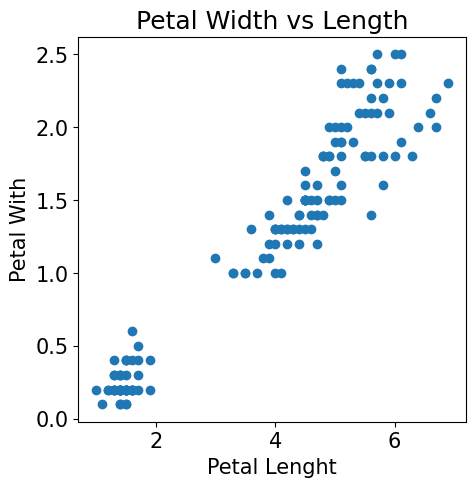

In [29]:
# se crean 2 variables para acceder a las features
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos una gráfica para comparar petal length eje x, petal width eje y
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Lenght")
ax.set_ylabel("Petal With")
ax.set_title("Petal Width vs Length")
f.tight_layout

In [35]:
# Importamos un objeto de regresion lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustamos el modelo alo datosn que ya tenemos 
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# se muestran por pantalla los eficientes y el sesgo

print("Coef ", model_1.coef_)
print("\n\nBias", model_1.intercept_)

Coef  [0.41490802]


Bias -0.357589314248546


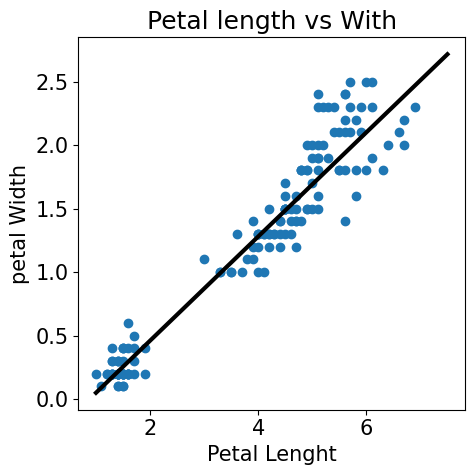

In [31]:
# Definimos las variables para acceder de forma mas simple a las columnas
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# se define un nuevo array que va desde el valor mas bajo de petal lenght hasta el valor maximo +1 
#en intervalos de 0.5
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# ecuación  de nuestra regresion lineal
yvals = 0.41*xvals -0.36

#Gráfica de la recta

f = plt .figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Lenght")
ax.set_ylabel("petal Width")
ax.set_title("Petal length vs With")
f.tight_layout()

In [34]:
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculo del MSE con valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

#Calculo de R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


In [36]:
# Modelo de regreción logistica
#Ajustamos los datos dee entrenamiento y prueba
xtrain = train.iloc[:, :-1]
ytrain = train.iloc[:, -1]
xtest = test.iloc[:, :-1]
ytest = test.iloc[:, -1]

#Configuramos la regresion logistica
model_2= linear_model.LogisticRegression()

model_2.fit(xtrain, ytrain)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Hacer predicciones con el conjunto de prueba
ypred = model_2.predict(xtest)

# Probamos la precicion 
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


In [38]:
# Matriz de confución
# Importamos el método de matriz de confución de sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a los valores de testing y tambien a los valores de predicción.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]], dtype=int64)

In [39]:
#Bosque aleatorio de clasificación

# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción 
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


In [40]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=2, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia = 86.39021984551397
Centroids (x, y) =
 [[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


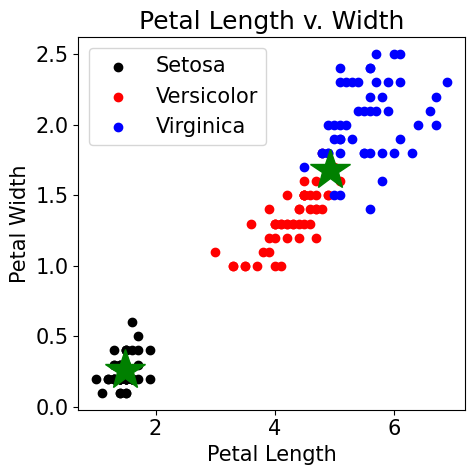

In [41]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()